In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('e-commerce_dataset.csv')

In [3]:
df['Customer ID'].nunique()

67339

In [4]:
df.head()

,Customer ID,Invoice Date,Stock Code,Description,Product Category,Purchase Amount (₹),Quantity,Discount Used,City,State,Country,Payment Mode
0,525147,2023-02-19 07:25:00,ELE210,Smartwatch,Electronics,1499,1,No,Bhopal,Madhya Pradesh,India,UPI
1,525147,2022-12-11 09:20:00,TOY647,Lego Set,Toys & Baby Products,1999,3,Yes,Bhopal,Madhya Pradesh,India,Debit Card
2,525147,2022-12-05 14:48:00,TOY427,Baby Stroller,Toys & Baby Products,4999,1,Yes,Mumbai,Maharashtra,India,Net Banking
3,525147,2023-01-21 05:14:00,GRO756,Wheat Flour (5kg),Groceries,249,3,Yes,Coimbatore,Tamil Nadu,India,Net Banking
4,525147,2023-07-13 16:31:00,FAS689,Kurta,Fashion,999,1,No,Bangalore,Karnataka,India,Cash on Delivery


In [5]:
df['City'].value_counts()

City
Lucknow          31036
Delhi            31023
Chandigarh       31008
Guwahati         31002
Ahmedabad        30983
Bangalore        30935
Visakhapatnam    30918
Surat            30870
Patna            30866
Bhubaneswar      30789
Bhopal           30779
Mumbai           30764
Kolkata          30740
Nagpur           30730
Hyderabad        30723
Indore           30699
Jaipur           30677
Pune             30615
Chennai          30565
Coimbatore       30517
Name: count, dtype: int64

In [6]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [7]:
current_date = df['Invoice Date'].max()

In [8]:
# Calculate Recency, Frequency, and Monetary for each customer
rfm = df.groupby('Customer ID').agg({
    'Invoice Date': lambda x: (current_date - x.max()).days,  # Recency
    'Stock Code': 'count',  # Frequency
    'Purchase Amount (₹)': 'sum'  # Monetary
}).reset_index()

In [9]:
# Rename the columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [10]:
# Assign RFM scores (1-5) using quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

In [11]:
# Combine RFM Scores to form a composite RFM_Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [12]:
# Save the RFM Score as a CSV file
rfm.to_csv('e-commerce_rfm_scores.csv', index=False)

In [13]:
data=pd.read_csv('e-commerce_rfm_scores.csv')

In [14]:
data.head()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,100002,135,5,98095,2,2,4,224
1,100004,315,3,39147,1,1,2,112
2,100029,61,10,55240,3,4,3,343
3,100044,7,9,153991,5,4,5,545
4,100051,688,1,59999,1,1,3,113


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67339 entries, 0 to 67338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer ID  67339 non-null  int64
 1   Recency      67339 non-null  int64
 2   Frequency    67339 non-null  int64
 3   Monetary     67339 non-null  int64
 4   R_Score      67339 non-null  int64
 5   F_Score      67339 non-null  int64
 6   M_Score      67339 non-null  int64
 7   RFM_Score    67339 non-null  int64
dtypes: int64(8)
memory usage: 4.1 MB


In [16]:
data.describe()

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,67339.000000,67339.000000,67339.000000,67339.000000,67339.000000,67339.000000,67339.000000,67339.000000
mean,552233.842053,115.876268,9.151294,80949.189741,3.007499,3.000000,2.999941,333.749877
std,259490.433601,134.956793,7.785315,81861.956658,1.415028,1.414235,1.414266,150.014294
min,100002.000000,0.000000,1.000000,50.000000,1.000000,1.000000,1.000000,111.000000
25%,328668.000000,24.000000,4.000000,23390.000000,2.000000,2.000000,2.000000,221.000000
50%,551849.000000,67.000000,7.000000,57443.000000,3.000000,3.000000,3.000000,334.000000
75%,777922.500000,154.000000,10.000000,110852.500000,4.000000,4.000000,4.000000,454.000000
max,999993.000000,730.000000,76.000000,862055.000000,5.000000,5.000000,5.000000,555.000000


In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

In [18]:
# Drop unnecessary columns
data.drop(['Customer ID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score'], axis=1, inplace=True)

In [19]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data[:5]

array([[ 0.14170368, -0.53322503,  0.2094494 ],
       [ 1.47547378, -0.79012084, -0.51064624],
       [-0.40662403,  0.10901448, -0.31405773],
       [-0.80675506, -0.01943342,  0.89226248],
       [ 4.23934184, -1.04701664, -0.25592285]])

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

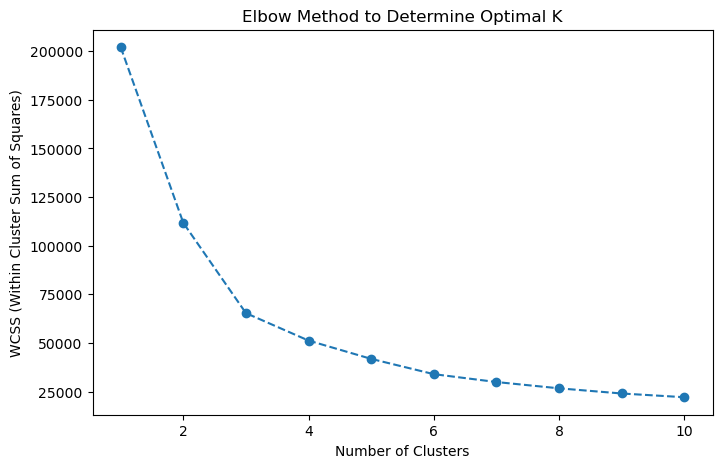

In [21]:
# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [22]:
# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

F:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [24]:
# Add the cluster labels to the original RFM dataframe
data['Cluster'] = clusters

In [25]:
# Check the first few records
data.head()

,Recency,Frequency,Monetary,Cluster
0,135,5,98095,1
1,315,3,39147,2
2,61,10,55240,1
3,7,9,153991,3
4,688,1,59999,2


In [26]:
# Analyze the clusters by groupby
cluster_analysis = data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()
print(cluster_analysis)


   Cluster     Recency  Frequency       Monetary
0        0   27.013576  26.828808  254768.587021
1        1   92.140187   5.752778   37807.241652
2        2  403.420360   2.791451   23686.743532
3        3   53.185055  11.401255  118777.714221


In an **e-commerce** use case, we can interpret the clusters as follows based on **Recency, Frequency, and Monetary (RFM) values**:

1. **Cluster 0** (High Frequency, High Monetary, Low Recency)  
   - **Recency:** 27 days (recent purchases)  
   - **Frequency:** 26.83 times (frequent shoppers)  
   - **Monetary:** $254,768.59 (high spenders)  
   - **Interpretation:** This segment represents **VIP or loyal customers** who shop frequently and spend the most. They should be **rewarded with exclusive deals, loyalty programs, and personalized offers** to maintain engagement.

2. **Cluster 1** (Medium Frequency, Medium Monetary, Medium Recency)  
   - **Recency:** 92 days  
   - **Frequency:** 5.75 times  
   - **Monetary:** $37,807.24  
   - **Interpretation:** This segment consists of **regular shoppers** who purchase occasionally but are still engaged. Offering **targeted promotions, limited-time discounts, or personalized recommendations** can encourage them to shop more frequently.

3. **Cluster 2** (Low Frequency, Low Monetary, High Recency)  
   - **Recency:** 403 days (haven't shopped in a long time)  
   - **Frequency:** 2.79 times  
   - **Monetary:** $23,686.74  
   - **Interpretation:** This segment consists of **churned or inactive customers** who haven’t made purchases recently. Strategies to **re-engage them** include **reactivation campaigns, win-back emails, special discounts, or incentives**.

4. **Cluster 3** (Moderate Frequency, Moderate Monetary, Moderate Recency)  
   - **Recency:** 53 days  
   - **Frequency:** 11.40 times  
   - **Monetary:** $118,777.71  
   - **Interpretation:** These are **potentially high-value customers** who are somewhat engaged. They might be transitioning into VIP customers. Offering **early access to new products, exclusive perks, and personalized promotions** can encourage them to spend more frequently.

### **Business Actions**
- **Cluster 0:** Focus on retention & VIP rewards.  
- **Cluster 1:** Encourage more frequent purchases via promotions.  
- **Cluster 2:** Re-engage with personalized win-back campaigns.  
- **Cluster 3:** Push toward o visualize this with charts? 📊

In [27]:
from mpl_toolkits.mplot3d import Axes3D

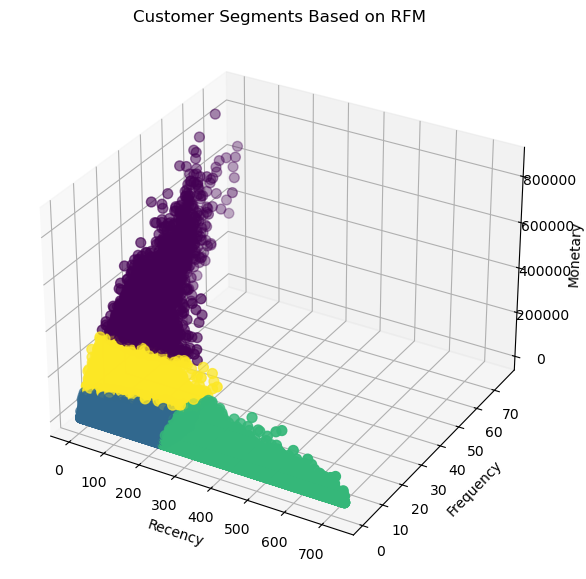

In [28]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot in 3D
ax.scatter(data['Recency'], data['Frequency'], data['Monetary'], c=data['Cluster'], cmap='viridis', s=50)
# Labels
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Customer Segments Based on RFM')
plt.show()


In [29]:
data['Segment'] = data['Cluster'].map({
    0: 'Loyal Customers',       # High Frequency, High Monetary, Low Recency
    1: 'Regular Shoppers',      # Medium Frequency, Medium Monetary, Medium Recency
    2: 'Churned Customers',     # Low Frequency, Low Monetary, High Recency
    3: 'Potential High-Value'   # Moderate Frequency, Moderate Monetary, Moderate Recency
})


In [30]:
data.to_csv('e-commerce_rfm_with_clusters.csv', index=False)

In [31]:
df_clusters=pd.read_csv('e-commerce_rfm_with_clusters.csv')

In [32]:
df_clusters.head()

,Recency,Frequency,Monetary,Cluster,Segment
0,135,5,98095,1,Regular Shoppers
1,315,3,39147,2,Churned Customers
2,61,10,55240,1,Regular Shoppers
3,7,9,153991,3,Potential High-Value
4,688,1,59999,2,Churned Customers


In [33]:
# Test the model

In [34]:
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

In [35]:
# Define the segment mapping based on your previous clustering
segment_mapping = {
    0: 'Loyal Customers',
    1: 'Regular Shoppers',
    2: 'Churned Customers',
    3: 'Potential High-Value'
}



In [36]:
# Predict the cluster for the new customer
new_data = [[15, 8, 75000]]  # Recency, Frequency, Monetary
scaled_data = scaler.transform(new_data)  # Apply the same scaling used during training
predicted_cluster = kmeans.predict(scaled_data)[0]  # Get the predicted cluster

F:\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:

# Get the segment name
predicted_segment = segment_mapping[predicted_cluster]

print("Predicted Cluster:", predicted_cluster)
print("Segment Name:", predicted_segment)

Predicted Cluster: 3
Segment Name: Potential High-Value
